<a href="https://colab.research.google.com/github/kwokjasmen-sys/TUGAS-DATA_MINING/blob/main/TUGAS_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Mengatur tampilan grafik agar cantik
sns.set_theme(style="whitegrid")
print("Library Berhasil Di-import! Lanjut ke Sel berikutnya.")

Library Berhasil Di-import! Lanjut ke Sel berikutnya.


In [ ]:
NAMA_FILE = '/content/indonesian_movies.csv'  # Nama file CSV
TARGET    = 'genre'                     # Kolom yang ingin diprediksi
# -------------------------------------------------

try:
    df = pd.read_csv(NAMA_FILE)
    print(f" Dataset '{NAMA_FILE}' berhasil dimuat!")
    print(f" Total Data: {df.shape[0]} Baris, {df.shape[1]} Kolom")
    print("\n--- 5 Baris Pertama Data ---")
    display(df.head())
except FileNotFoundError:
    print(f" Error: File '{NAMA_FILE}' tidak ditemukan. Cek upload file di folder kiri Colab.")

 Dataset '/content/indonesian_movies.csv' berhasil dimuat!
 Total Data: 1272 Baris, 11 Kolom

--- 5 Baris Pertama Data ---


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


/tmp/ipython-input-3141583504.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=TARGET, data=df, palette='viridis')


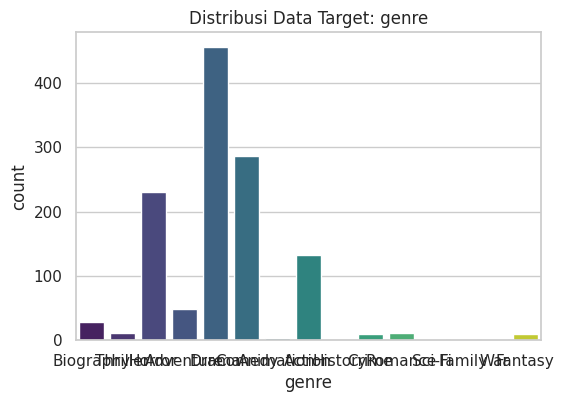

ℹ Grafik di atas menunjukkan jumlah data untuk setiap kategori di kolom 'genre'.


In [ ]:
print("--- Informasi Dataset ---")
df.info()

# Visualisasi Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET, data=df, palette='viridis')
plt.title(f'Distribusi Data Target: {TARGET}')
plt.show()

print(f"ℹ Grafik di atas menunjukkan jumlah data untuk setiap kategori di kolom '{TARGET}'.")

In [ ]:
print(" Sedang memproses data secara otomatis...")
df_clean = df.copy()

# 1. Hapus Kolom ID/Unik (Data yang berbeda di setiap baris tidak berguna untuk pola)
for col in df_clean.columns:
    if df_clean[col].nunique() == len(df_clean) and df_clean[col].dtype == 'object':
        print(f"   -> Membuang kolom ID (unik): {col}")
        df_clean.drop(col, axis=1, inplace=True)

# 2. Encoding (Ubah Teks -> Angka)
le_dict = {} # Simpan encoder biar rapi
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))
        le_dict[col] = le
        # print(f"   -> Mengubah teks ke angka: {col}")

# 3. Handling Missing Values (Isi NaN dengan 0)
df_clean.fillna(0, inplace=True)

print("\n Preprocessing Selesai! Data siap dilatih.")
display(df_clean.head(3))

 Sedang memproses data secara otomatis...

 Preprocessing Selesai! Data siap dilatih.


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,2,2020,275,3,0,6.5,37,3,273,45,0
1,29,2020,592,13,1,6.4,288,3,151,932,65
2,65,2020,200,10,0,5.4,76,3,148,805,77


In [ ]:
X = df_clean.drop(TARGET, axis=1) # Fitur (Soal)
y = df_clean[TARGET]              # Target (Jawaban)

# Bagi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Data Latih (Train) : {X_train.shape[0]} baris")
print(f" Data Uji (Test)    : {X_test.shape[0]} baris")

 Data Latih (Train) : 1017 baris
 Data Uji (Test)    : 255 baris


In [ ]:
print(" Sedang melatih model Random Forest...")

# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih Model
model.fit(X_train, y_train)

print(" Model selesai dilatih!")

 Sedang melatih model Random Forest...
 Model selesai dilatih!


In [ ]:
y_pred = model.predict(X_test)

# Hitung Metrik
acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Buat Tabel Laporan
hasil_evaluasi = pd.DataFrame({
    'Algoritma': ['Random Forest'],
    'Akurasi': [f"{acc:.2%}"],
    'Precision': [f"{prec:.2%}"],
    'Recall': [f"{rec:.2%}"],
    'F1-Score': [f"{f1:.2%}"]
})

print("\n---  TABEL HASIL EVALUASI ---")
display(hasil_evaluasi)


---  TABEL HASIL EVALUASI ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Algoritma,Akurasi,Precision,Recall,F1-Score
0,Random Forest,48.24%,42.75%,48.24%,43.31%


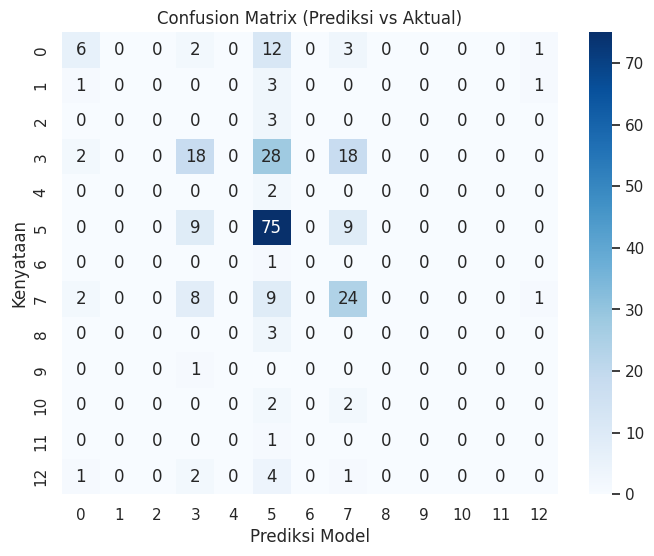

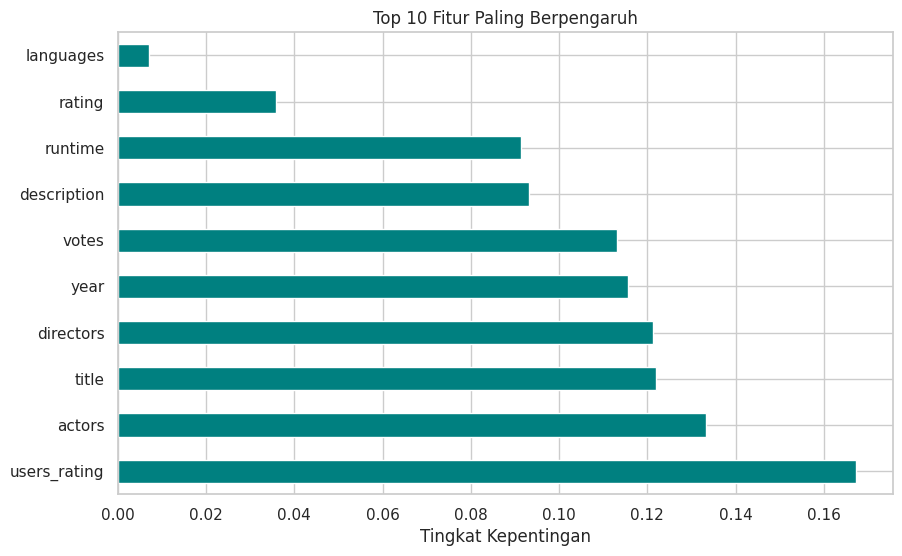

In [ ]:
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Prediksi vs Aktual)')
plt.ylabel('Kenyataan')
plt.xlabel('Prediksi Model')
plt.show()

# 2. Feature Importance (Faktor Paling Berpengaruh)
if hasattr(model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='teal')
    plt.title('Top 10 Fitur Paling Berpengaruh')
    plt.xlabel('Tingkat Kepentingan')
    plt.show()